Evaluating the model on the test dataset...
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step   
Test Accuracy: 0.9913

Classification Report:
                   precision    recall  f1-score   support

Benjamin_Netanyau       0.98      0.99      0.99       310
 Jens_Stoltenberg       0.98      0.99      0.99       310
    Julia_Gillard       1.00      0.99      0.99       286
  Magaret_Tarcher       0.99      0.99      0.99       289
   Nelson_Mandela       1.00      1.00      1.00       306

         accuracy                           0.99      1501
        macro avg       0.99      0.99      0.99      1501
     weighted avg       0.99      0.99      0.99      1501



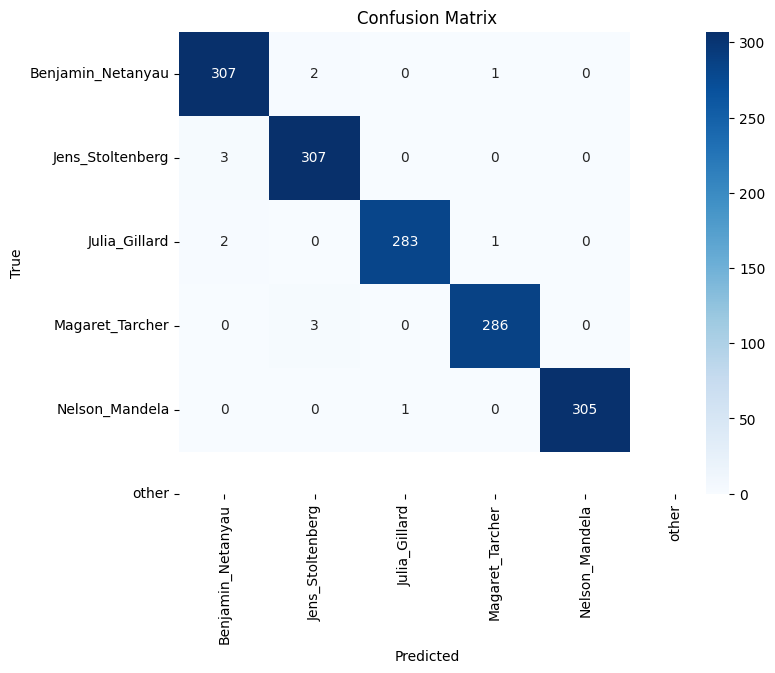

In [1]:

import numpy as np
from tensorflow.keras.models import load_model
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Disable TensorFlow optimizations for reproducibility
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Function to load pre-saved test data and labels
def load_test_data():
    if not (os.path.exists("X_test_cnn.npy") and os.path.exists("y_test.npy") and os.path.exists("label_encoder_classes.npy")):
        raise FileNotFoundError("Required files 'X_test_cnn.npy', 'y_test.npy', or 'label_encoder_classes.npy' not found.")
    
    X_test_cnn = np.load("X_test_cnn.npy")
    y_test = np.load("y_test.npy")
    label_classes = np.load('label_encoder_classes.npy', allow_pickle=True)
    
    label_encoder = LabelEncoder()
    label_encoder.classes_ = label_classes
    return X_test_cnn, y_test, label_encoder

# Load the trained CNN model
def load_cnn_model():
    model = load_model("cnn_model.keras")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile for evaluation
    return model

# Evaluate the model on the test dataset
def evaluate_model(model, X_test, y_test, label_encoder):
    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)
    y_test_labels = label_encoder.inverse_transform(y_test)
    predicted_speakers = label_encoder.inverse_transform(predicted_labels)
    
    accuracy = accuracy_score(y_test_labels, predicted_speakers)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test_labels, predicted_speakers))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_labels, predicted_speakers)

    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    return predicted_speakers

# Main function
def main():
    try:
        X_test_cnn, y_test, label_encoder = load_test_data()
        model = load_cnn_model()
        
        print("Evaluating the model on the test dataset...")
        evaluate_model(model, X_test_cnn, y_test, label_encoder)
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the main function
if __name__ == "__main__":
    main()